# Minu esimese taseme pealkiri 

## Minu teine taseme pealkiri

Tavaline tekst

blublu


   year  population  women_population  male_population
0  2024     1371986            719653           652333
1  2023     1370286            719434           650852
2  2022     1348840            708704           640136
3  2021     1330932            699762           631170
4  2020     1329522            699591           629931


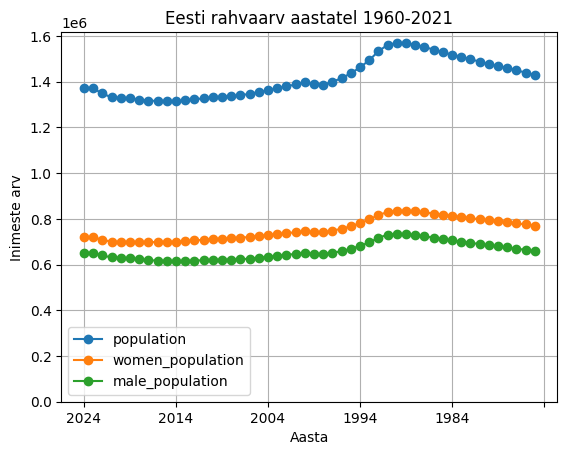

In [1]:
# paigalda pip install tools.api_request

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# url = "https://demo-datahub.rik.ee/api/v1/meta/classifications"

url_riik = 'https://api.worldbank.org/v2/countries/EST/?format=json'
url_rahvastik_ = 'https://api.worldbank.org/v2/country/EST/indicator/SP.POP.TOTL?format=json'
url_women = "https://api.worldbank.org/v2/country/EST/indicator/SP.POP.TOTL.FE.IN?format=json"
url_male = "https://api.worldbank.org/v2/country/EST/indicator/SP.POP.TOTL.MA.IN?format=json"

response = requests.get(url_rahvastik_)
data = response.json()

response_woman = requests.get(url_women)
data_woman = response_woman.json()

response_male = requests.get(url_male)  
data_male = response_male.json()

# json dumps muudab väljundi terminalis loetavaks
# print(json.dumps(data, indent=2, ensure_ascii=False))

values = {'year': [], 'population': [], "women_population": [], "male_population": []}

# {"year": ["2021", "2020", "2019", ...], "population": [1331057, 1326535, 1324820, ...]}

for item in data[1]:
    values['year'].append(item['date'])
    values['population'].append(item['value'])

for women in data_woman[1]:
    values['women_population'].append(women['value'])

for male in data_male[1]:
    values ['male_population'].append(male['value'])    

# print(json.dumps(values, indent=2, ensure_ascii=False))

df = pd.DataFrame(values)

# väljastan esimesed read
print(df.head())

# joonistamise osa
df.plot(x='year', y=['population', 'women_population', 'male_population'], kind='line', marker='o',
        title='Eesti rahvaarv aastatel 1960-2021', xlabel='Aasta', ylabel='Inimeste arv')
plt.ylim(bottom=0)  # y-telje alumine piir
plt.grid(visible=True)  # võrgustik

plt.savefig('output/population_est.png')
plt.show()



# print(df)

# response_df = pd.json_normalize(data)
# print(response_df)

## Müüginäitajad

- Teeme mõned group by kasutades dataframe (pie).


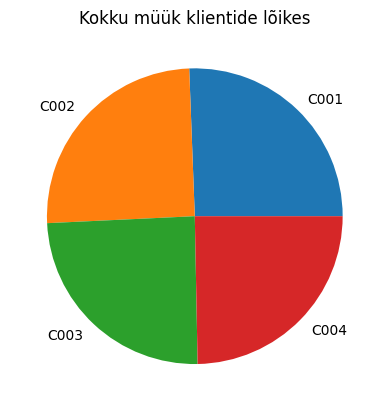

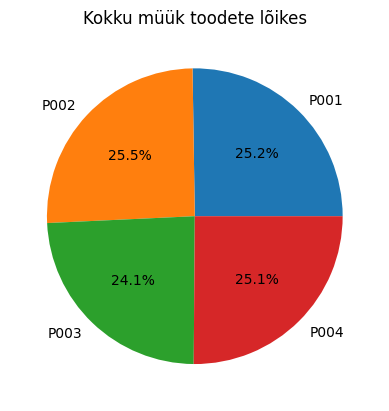

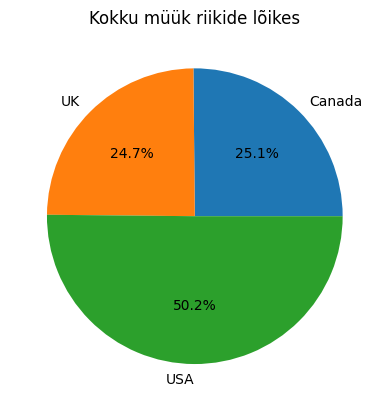

In [12]:
import pandas as pd
import matplotlib.pyplot as plt 

source_url = r'C:\Users\opilane\Desktop\Andmetarkus,git\Andmetarkus\Python\ANALYSIS\input\SalesTable.csv'
source2_url = r'C:\Users\opilane\Desktop\Andmetarkus,git\Andmetarkus\Python\ANALYSIS\input\CustomerTable.csv'

sales_data = pd.read_csv(source_url)
customer_data = pd.read_csv(source2_url)

merged_data = pd.merge(sales_data, customer_data, on='CustomerID', how='left')
merged_data['Amount'] = merged_data['Quantity'] * merged_data['UnitPrice'] * (1- merged_data['Discount'])

grouped_by_customerID = merged_data.groupby('CustomerID').sum(numeric_only=True)
grouped_by_customerID.plot(y='Amount', kind='pie', title='Kokku müük klientide lõikes', ylabel='', legend=False)    
plt.show()

grouped_by_productID = merged_data.groupby('ProductID').sum(numeric_only=True)
grouped_by_productID.plot(y='Amount', kind='pie', title='Kokku müük toodete lõikes', ylabel='', legend=False, autopct='%1.1f%%')

plt.show()

grouped_by_country = merged_data.groupby('Country').sum(numeric_only=True)
grouped_by_country.plot(y='Amount', kind='pie', title='Kokku müük riikide lõikes', ylabel='', legend=False, autopct='%1.1f%%')
plt.show()




   SaleID        Date CustomerID ProductID  Quantity  UnitPrice  Discount  \
0  S00001  2023-01-31       C004      P004         5      56.81      0.10   
1  S00002  2023-12-30       C001      P004         7      98.78      0.15   
2  S00003  2022-05-10       C001      P004         3      97.12      0.15   
3  S00004  2023-07-18       C003      P002         9      47.33      0.05   
4  S00005  2023-02-04       C004      P001         4      71.67      0.15   

  SalesRepID RegionID_x CustomerName    Industry Country RegionID_y  \
0       SR02        R03  Delta Group      Retail      UK        R03   
1       SR01        R01    Alice Ltd      Retail     USA        R01   
2       SR01        R01    Alice Ltd      Retail     USA        R01   
3       SR01        R01  Charlie LLC  E-commerce     USA        R01   
4       SR02        R03  Delta Group      Retail      UK        R03   

  ProductName     Category  CostPrice Manufacturer    Amount  
0    Device D   Home Goods       20.0    Delta 

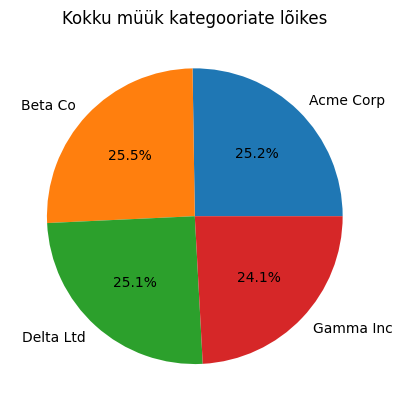

In [23]:
import pandas as pd
import matplotlib.pyplot as plt 

source_url = r'C:\Users\opilane\Desktop\Andmetarkus,git\Andmetarkus\Python\ANALYSIS\input\SalesTable.csv'
source2_url = r'C:\Users\opilane\Desktop\Andmetarkus,git\Andmetarkus\Python\ANALYSIS\input\CustomerTable.csv'
source3_url = r'C:\Users\opilane\Desktop\Andmetarkus,git\Andmetarkus\Python\ANALYSIS\input\ProductTable.xlsx'

sales_data = pd.read_csv(source_url)
customer_data = pd.read_csv(source2_url)
product_data = pd.read_excel(source3_url)

merged_data = pd.merge(sales_data, customer_data, on='CustomerID', how='left')
merged_data2 = pd.merge(merged_data, product_data, on='ProductID', how='left')
merged_data['Amount'] = merged_data['Quantity'] * merged_data['UnitPrice'] * (1- merged_data['Discount'])
merged_data2['Amount'] = merged_data2['Quantity'] * merged_data2['UnitPrice'] * (1- merged_data2['Discount'])

print(merged_data2.head())



grouped_by_manufacturer = merged_data2.groupby('Manufacturer').sum(numeric_only=True)
grouped_by_manufacturer.plot(y='Amount', kind='pie', title='Kokku müük kategooriate lõikes', ylabel='', legend=False, autopct='%1.1f%%')
plt.show()
